# Contents

* Introduction
* Stage 1 : Data overview
    * 1.1 Goal
    * 1.2 Stages
    
* Stage 2 : Langkah 1: Data Preprocessing
    * 2.1 Import Library
    * 2.2 Load Data
    * 2.3 Data Quality Checking
        * 2.3.1 Visits
        * 2.3.2 Orders
        * 2.3.3 Costs
    * 2.4 Data Cleansing
        * 2.4.1 Visits
        * 2.4.2 Orders
        * 2.4.3 Costs
    
* Stage 3 : Langkah 2: 
    * 3.1 Produk
        * 3.1.1 Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan?
        * 3.1.2 Berapa jumlah sesi per harinya? (Satu pengguna mungkin saja memiliki lebih dari satu sesi)
        * 3.1.3 Berapa lama durasi untuk setiap sesi?
        * 3.1.4 Seberapa sering pengguna kembali untuk menggunakan produk?
    * 3.2 Penjualan
        * 3.2.1 Kapan orang-orang mulai melakukan pembelian?
        * 3.2.2 Berapa jumlah pesanan yang mereka buat selama periode waktu tertentu?
        * 3.2.3 Berapa besaran rata-rata pembeliannya?
        * 3.2.4 Berapa jumlah uang yang mereka kontribusikan? (LTV)
    * 3.3 Pemasaran 
        * 3.3.1 Berapa jumlah uang yang dihabiskan? Keseluruhan/per sumber/dari waktu ke waktu
        * 3.3.2 Berapa biaya akuisisi pelanggan dari masing-masing sumber?
        * 3.3.3 Seberapa menguntungkannya investasi tersebut? (ROI)
        
* Stage 4 : Langkah 3 : Kesimpulan Umum


#  Introduction

Setiap kali kita melakukan penelitian, kita membutuhkan formula hipotesis yang akan kita uji. Terkadang kita bisa menerima hipotesis tersebut, dan juga kita dapat menolaknya. Pebisnis harus paham untuk membuat asumsi yang tepat.

Dalam projek kali ini, kita akan menganalisis data yang ada untuk mengoptimalkan anggaran biaya pemasaran dengan menghitung metrik-metrik yang diperlukan. 

Terdapat data yang tersedia dari database, Yang mana data tersebut akan dilakukan analisis seperti berikut :

   * Sumber/platform apa yang akan direkomendasikan? 
   * Metrik apa saja yang menjadi fokus dalam projek ini? Mengapa?
   * Kesimpulan apa yang akan dibuat setelah menemukan nilai dari metrik-metrik tersebut?

## Data Overview

Kamu berhasil menunjukkan kinerja yang cemerlang selama mengikuti kursus TripleTen. Karena itu, kamu pun ditawarkan kesempatan untuk menjalani program magang di departemen analitik perusahaan Y.Afisha. Nah, tugas pertama yang mereka berikan kepadamu adalah membantu mengoptimalkan anggaran biaya pemasaran. 

Kamu dibekali dengan:
* Log/catatan server yang memuat data kunjungan ke situs Y.Afisha dari bulan Januari 2017 hingga bulan Desember 2018
* File dump yang memuat semua pesanan untuk periode tersebut
* Statistik biaya pemasaran

Kamu akan mempelajari: 
* Bagaimana para pengguna menggunakan produk Y.Afisha
* Kapan mereka mulai melakukan pembelian
* Berapa jumlah uang yang disumbangkan oleh setiap pengguna
* Kapan semua biaya pemasaran terbayarkan

### Goal

Tujuan Utama dalam Analisis Data ini adalah :

   1. Menganalisis data yang ada untuk mengoptimalkan anggaran biaya pemasaran dengan menghitung metrik-metrik yang diperlukan.
    
### Stages

Data yang berasal dari departemen periklanan disimpan dalam beberapa file :
   * '/datasets/visits_log_us.csv'
   * '/datasets/orders_log_us.csv'
   * '/datasets/costs_us.csv'

Tidak terdapat informasi tentang kualitas data, sehingga kita harus eksplor data tersebut sebelum melakukan hipotesis.

Pertama, kita akan mengevaluasi kualitas data dan melihat apakah ada masalah yang signifikan. Kemudian, selama data preprocessing, kita akan menghitung masalah kritis.

Dalam projek ini terdiri dari empat tahapan : 

    1. Data overview
    2. Data preprocessing
    3. Exploratory Data Analysis (EDA)
    4. Analisis Data Statistik

## Langkah 1:  Data Preprocessing 

* Simpan data kunjungan, pesanan, dan pengeluaran ke dalam variabel. 
* Optimalkan data yang kamu miliki untuk keperluan analisis. 
* Pastikan bahwa semua kolom disajikan dengan tipe data yang benar.

### Import Library

In [1]:
# Import Library Data Processing
import pandas as pd, numpy as np
# Import Library Data Visualization
import matplotlib.pyplot as plt, seaborn as sns
# Import library Warnings
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
df_visits = pd.read_csv(r'/datasets/visits_log_us.csv')
df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
df_orders = pd.read_csv(r'/datasets/orders_log_us.csv')
df_orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [4]:
df_costs = pd.read_csv(r'/datasets/costs_us.csv')
df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### Data Quality Checking

#### Visits

In [5]:
# cek info pada visits
df_visits.info()
print('\nmissing value: \n', df_visits.isnull().sum())
print('\nDuplikasi    :', df_visits.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

missing value: 
 Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

Duplikasi    : 0


#### Orders

In [6]:
# cek info pada orders
df_orders.info()
print('\nmissing value: \n', df_orders.isnull().sum())
print('\nDuplikasi    :', df_orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

missing value: 
 Buy Ts     0
Revenue    0
Uid        0
dtype: int64

Duplikasi    : 0


#### Costs

In [7]:
# cek info pada costs
df_costs.info()
print('\nmissing value: \n', df_costs.isnull().sum())
print('\nDuplikasi    :', df_costs.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

missing value: 
 source_id    0
dt           0
costs        0
dtype: int64

Duplikasi    : 0


**Kesimpulan Sementara**

1. Tidak terdapat missing value dan duplikasi pada ketiga dataset
2. Kolom Start Ts dan End Ts pada datasets visits memiliki tipe data yang salah harus di rubah terlebih dahulu ke tipe data date time
3. Kolom Buy Ts pada datasets orders memiliki tipe data yang salah harus di rubah terlebih dahulu ke tipe data date time
4. Kolom dt pada datasets costs memiliki tipe data yang salah harus di rubah terlebih dahulu ke tipe data date time

### Data Cleansing

#### Visits

In [8]:
# Ubah tipe data ke datetime
df_visits['Start Ts'] = pd.to_datetime(df_visits['Start Ts'])
df_visits['End Ts'] = pd.to_datetime(df_visits['End Ts'])

In [9]:
# ubah nama kolom
df_visits.columns = ['device', 'session_end_ts', 'source_id', 'session_start_ts', 'uid']

In [10]:
#cek apakah ada waktu mulai yang lebih besar dari waktu selesai
df_visits[df_visits['session_start_ts'] > df_visits['session_end_ts']]

,device,session_end_ts,source_id,session_start_ts,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


* Terdapat kolom yang memiliki waktu mulai lebih besar dari waktu selesai, hal itu merupakan hal yang mustahil
* Oleh karena itu filter kolom tersebut

In [11]:
# filter datasets df_visits
df_visits = df_visits[df_visits['session_start_ts'] <= df_visits['session_end_ts']]

In [12]:
# cek dataset kembali
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359398 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   device            359398 non-null  object        
 1   session_end_ts    359398 non-null  datetime64[ns]
 2   source_id         359398 non-null  int64         
 3   session_start_ts  359398 non-null  datetime64[ns]
 4   uid               359398 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 16.5+ MB


**Kesimpulan Sementara**

1. Semua kolom sudah memiliki tipe data yang sesuai
2. Datasets telah di filter sehingga datasets visits sudah bersih

#### Orders

In [13]:
# Ubah tipe data ke datetime
df_orders['Buy Ts'] = pd.to_datetime(df_orders['Buy Ts'])

In [14]:
# ubah nama kolom
df_orders.columns = ['buy_ts', 'revenue', 'uid']

In [15]:
# cek dataset kembali
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


**Kesimpulan Sementara**
1. Semua kolom sudah memiliki tipe data yang sesuai

#### Costs

In [16]:
# Ubah tipe data ke datetime
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

In [17]:
# cek dataset kembali
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


**Kesimpulan Sementara**
1. Semua kolom sudah memiliki tipe data yang sesuai

## Langkah 2: Susun laporan dan hitung metrik-metrik yang diperlukan:

### Produk
* Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan?
* Berapa jumlah sesi per harinya? (Satu pengguna mungkin saja memiliki lebih dari satu sesi).
* Berapa lama durasi untuk setiap sesi?
* Seberapa sering pengguna kembali untuk menggunakan produk?

#### Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan?

In [18]:
# cek data
df_visits.head()

,device,session_end_ts,source_id,session_start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [19]:
# ekstrak data / membagi data sesuai year, month, week and date
df_visits['session_year'] = df_visits['session_start_ts'].astype('datetime64[Y]')
df_visits['session_month'] = df_visits['session_start_ts'].astype('datetime64[M]')
df_visits['session_week'] = df_visits['session_start_ts'].astype('datetime64[W]')
df_visits['session_date'] = df_visits['session_start_ts'].dt.date

In [20]:
# grouping sesuai harian, mingguan dan bulanan
dau_total = df_visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = df_visits.groupby('session_week').agg({'uid': 'nunique'}).mean()
mau_total = df_visits.groupby('session_month').agg({'uid': 'nunique'}).mean()

print('DAU for the entire period:', int(dau_total), 'users')
print('WAU for the entire period:', int(wau_total), 'users')
print('MAU for the entire period:', int(mau_total), 'users')

DAU for the entire period: 907 users
WAU for the entire period: 5724 users
MAU for the entire period: 23228 users


* Data diatas merupakan jumlah total user setiap session berdasarkan Harian (DAU), Mingguan (WAU) dan Bulanan (MAU) 

In [21]:
# buat perulangan untuk session month
dau_monthly = {}

for month, df in df_visits.groupby('session_month'):
    key = month.strftime('%Y-%m')
    value = df.groupby('session_date').agg({'uid':'nunique'}).mean()
    dau_monthly[key] = int(value)

In [22]:
df_visits[df_visits['session_month'] == '2017-12-01'].groupby('session_date').agg({'uid':'nunique'}).mean()

uid    1240.967742
dtype: float64

In [23]:
df_visits.groupby('session_month')

In [24]:
dau_monthly

{'2017-06': 510,
 '2017-07': 532,
 '2017-08': 433,
 '2017-09': 739,
 '2017-10': 1133,
 '2017-11': 1328,
 '2017-12': 1240,
 '2018-01': 1096,
 '2018-02': 1217,
 '2018-03': 1052,
 '2018-04': 845,
 '2018-05': 786}

* Data diatas merupakan total user setiap bulannya dalam 1 tahun

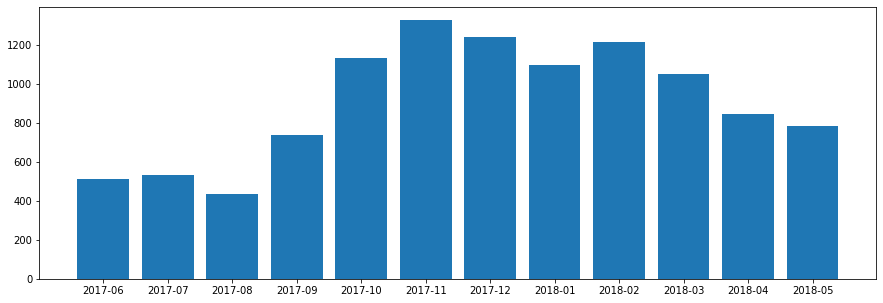

In [25]:
# buat grafik/plotting
x = [x.replace(' 00:00:00', '') for x in dau_monthly.keys()]
y = dau_monthly.values()

plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.show()

**Kesimpulan Sementara**
* findings : 
    * Bulan November tahun 2017 merupakan bulan paling banyak users melakukan kunjungan ke situs Y.Afisha
    * Bulan Agustus tahun 2017 merupakan bulan paling sedikit users melakukan kunjungan ke situs Y.Afisha
    
* insight :
    * Jumlah users yang melakukan kunjungan Sejak bulan pertama hingga bulan terakhir mengalami fluktuatif (tidak menentu) 

#### Berapa jumlah sesi per harinya? (Satu pengguna mungkin saja memiliki lebih dari satu sesi).

In [26]:
#cek kembali datanya
df_visits.head()

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [27]:
# kelompokkan sesi per user
sess_per_user = df_visits.groupby('session_date').agg({'uid': ['count','nunique']})
sess_per_user

uid        
             count nunique
session_date              
2017-06-01     664     605
2017-06-02     658     608
2017-06-03     477     445
2017-06-04     510     476
2017-06-05     893     820
...            ...     ...
2018-05-27     672     620
2018-05-28    1156    1039
2018-05-29    1035     948
2018-05-30    1410    1289
2018-05-31    2256    1997

[364 rows x 2 columns]

In [28]:
# perbaiki nama kolom
sess_per_user.columns = ['n_sessions', 'n_users']
sess_per_user

,n_sessions,n_users
session_date,,
2017-06-01,664,605
2017-06-02,658,608
2017-06-03,477,445
2017-06-04,510,476
2017-06-05,893,820
...,...,...
2018-05-27,672,620
2018-05-28,1156,1039
2018-05-29,1035,948


In [29]:
# buat kolom sessi per user
sess_per_user['sess_per_user'] = sess_per_user['n_sessions'] / sess_per_user['n_users']
sess_per_user

,n_sessions,n_users,sess_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


* Hampir semua user melakukan kunjungan ke situs lebih dari 1 kali

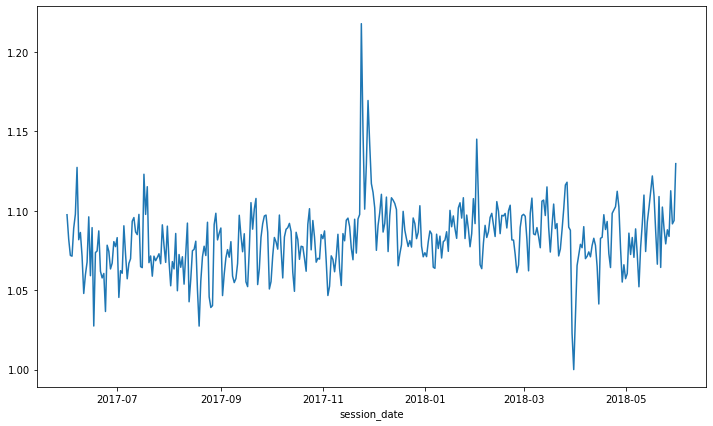

In [30]:
# buat grafiknya
sess_per_user['sess_per_user'].plot(kind='line',figsize=(12,7))
plt.show()

**Kesimpulan Sementara**

* findings: 
    * Jumlah sesi paling banyak setiap user adalah di bulan desember 2017
    * Jumlah sesi paling sedikit setiap user adalah di bulan april 2018
    
* insight: 
    * Desember adalah akhir tahun dan merupakan bulan liburan, bisa jadi orang sering mengunjungi situs untuk mendengarkan musik 
    * Bulan April 2018 bisa jadi menjadi bulan yang sibuk untuk orang-orang sehingga jarang memasuki situs, atau bisa jadi pada bulan tersebut situs sedang ada masalah teknis 

#### Berapa lama durasi untuk setiap sesi?

In [31]:
# cek data nya
df_visits.head()

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [32]:
# cek tipe datanya
df_visits.dtypes

device                      object
session_end_ts      datetime64[ns]
source_id                    int64
session_start_ts    datetime64[ns]
uid                         uint64
session_year        datetime64[ns]
session_month       datetime64[ns]
session_week        datetime64[ns]
session_date                object
dtype: object

In [33]:
# buat kolom durasi sesi dalam detik
df_visits['session_duration_sec'] = (df_visits['session_end_ts'] - df_visits['session_start_ts']).dt.seconds

In [34]:
# lihat deskripsi ny
df_visits['session_duration_sec'].describe()

count    359398.000000
mean        643.042287
std         997.105212
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration_sec, dtype: float64

In [35]:
# lihat jumlahny
df_visits['session_duration_sec'].value_counts()

60       53029
0        35794
120      35748
180      26672
240      21085
         ...  
24420        1
15900        1
15540        1
18300        1
15660        1
Name: session_duration_sec, Length: 310, dtype: int64

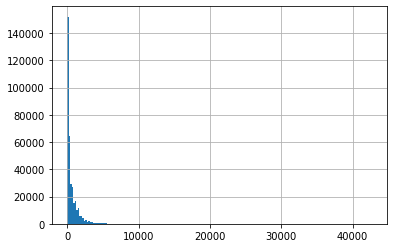

In [36]:
# buat grafiknya 
df_visits['session_duration_sec'].hist(bins=200)
plt.show()

In [37]:
# cari rata-rata, median dan modus nya
print('Average session length: {:.2f} sec'.format(df_visits['session_duration_sec'].mean()))
print('Median session length: {:.2f} sec'.format(df_visits['session_duration_sec'].median()))
print('Mode session length: {:.2f} sec'.format(df_visits['session_duration_sec'].mode()[0]))

Average session length: 643.04 sec
Median session length: 300.00 sec
Mode session length: 60.00 sec


**Kesimpulan Sementara**
* findings : 
    * Rata-rata panjang durasi sesi setiap user adalah 643 detik atau sekitar 10 menit
    * Median panjang durasi sesi setiap user adalah 300 detik atau sekitar 5 menit
    * Modus panjang durasi sesi setiap user adalah 60 detik atau 1 menit

* insight :
    * Orang-orang lebih sering mengunjungi situs hanya dalam sekitar 1 menit
    * 50% orang mengunjungi situs sekitar 5 menit

#### Seberapa sering pengguna kembali untuk menggunakan produk?

In [38]:
# buat variabel baru untuk kunjungan pertama pelanggan
first_visits = df_visits.groupby('uid').agg({'session_start_ts': 'min'}).reset_index()
# perbaiki nama kolom
first_visits.columns = ['uid', 'first_session_start_ts']
# cek data
first_visits.head()

,uid,first_session_start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [39]:
# ekstrak data / membagi data sesuai year, month, week and date\
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_week'] = first_visits['first_session_start_ts'].astype('datetime64[W]')
first_visits['first_session_month'] = first_visits['first_session_start_ts'].astype('datetime64[M]')
first_visits['first_session_year'] = first_visits['first_session_start_ts'].astype('datetime64[Y]')

In [40]:
first_visits

,uid,first_session_start_ts,first_session_dt,first_session_week,first_session_month,first_session_year
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,2018-01-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,2018-02-01,2018-01-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,2017-06-01,2017-01-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-28,2017-09-01,2017-01-01
...,...,...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,2017-11-30,2017-11-30,2017-11-01,2017-01-01
228165,18446424184725333426,2017-12-06 20:32:00,2017-12-06,2017-11-30,2017-12-01,2017-01-01
228166,18446556406699109058,2018-01-01 16:29:00,2018-01-01,2017-12-28,2018-01-01,2018-01-01
228167,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-21,2017-12-01,2017-01-01


In [41]:
df_visits.shape

(359398, 10)

In [42]:
df_visits.head(2)

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680


In [43]:
# gabungkan data pada first visit ke df visits
vis = pd.merge(df_visits, first_visits, on='uid')

# hitung waktu antara first user session dan setiap session berikutnya
vis['age_days'] = (vis['session_date'] - vis['first_session_dt']).dt.days
vis['age_months'] = round(vis['age_days'] / 30,0).astype('int')

In [44]:
#cek data
vis.sample(5)

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_start_ts,first_session_dt,first_session_week,first_session_month,first_session_year,age_days,age_months
171326,desktop,2018-03-28 18:26:00,4,2018-03-28 18:24:00,121326211842949927,2018-01-01,2018-03-01,2018-03-22,2018-03-28,120,2018-03-28 18:24:00,2018-03-28,2018-03-22,2018-03-01,2018-01-01,0,0
103493,desktop,2017-11-24 20:04:00,4,2017-11-24 19:19:00,17531334698861881627,2017-01-01,2017-11-01,2017-11-23,2017-11-24,2700,2017-11-24 19:19:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,0,0
107387,desktop,2018-02-04 18:26:00,5,2018-02-04 18:14:00,17722998038410096983,2018-01-01,2018-02-01,2018-02-01,2018-02-04,720,2018-02-04 18:14:00,2018-02-04,2018-02-01,2018-02-01,2018-01-01,0,0
309338,touch,2018-03-25 16:43:00,4,2018-03-25 16:43:00,1328939169671300623,2018-01-01,2018-03-01,2018-03-22,2018-03-25,0,2018-03-25 16:43:00,2018-03-25,2018-03-22,2018-03-01,2018-01-01,0,0
254223,touch,2017-11-01 19:45:00,4,2017-11-01 19:43:00,15668872638768674554,2017-01-01,2017-11-01,2017-10-26,2017-11-01,120,2017-11-01 19:43:00,2017-11-01,2017-10-26,2017-11-01,2017-01-01,0,0


In [45]:
# buat cohorts berdasarkan bulan
cohorts = vis.pivot_table(index='first_session_month',
                          columns='age_months', 
                          values='uid', 
                          aggfunc='nunique')

In [46]:
# tampilkan cohorts ny
cohorts.fillna('')

age_months,0,1,2,3,4,5,6,7,8,9,10,11,12
first_session_month,,,,,,,,,,,,,
2017-06-01,13259.0,955.0,720.0,775.0,944.0,847.0,875.0,713.0,746.0,659.0,576.0,513.0,272.0
2017-07-01,13140.0,716.0,688.0,675.0,767.0,609.0,606.0,619.0,527.0,379.0,337.0,113.0,
2017-08-01,10181.0,691.0,634.0,577.0,547.0,412.0,438.0,340.0,299.0,243.0,58.0,,
2017-09-01,16704.0,1239.0,1117.0,816.0,683.0,642.0,571.0,420.0,366.0,61.0,,,
2017-10-01,25977.0,1858.0,1384.0,960.0,975.0,787.0,565.0,478.0,120.0,,,,
2017-11-01,27248.0,1849.0,1270.0,1016.0,900.0,639.0,520.0,107.0,,,,,
2017-12-01,25268.0,1257.0,1057.0,719.0,577.0,400.0,101.0,,,,,,
2018-01-01,22624.0,1191.0,830.0,557.0,421.0,47.0,,,,,,,
2018-02-01,22197.0,1039.0,602.0,407.0,67.0,,,,,,,,


In [47]:
# buat retensi nya
retention = pd.DataFrame()
for col in cohorts.columns:
    retention = pd.concat([retention, cohorts[col]/cohorts[0]*100], axis=1)
retention.columns = cohorts.columns

In [48]:
retention.fillna('')

age_months,0,1,2,3,4,5,6,7,8,9,10,11,12
2017-06-01 00:00:00,100.0,7.202655,5.430274,5.845086,7.119692,6.388114,6.599291,5.377479,5.626367,4.970209,4.344219,3.86907,2.051437
2017-07-01 00:00:00,100.0,5.449011,5.235921,5.136986,5.837139,4.634703,4.611872,4.710807,4.010654,2.884323,2.564688,0.85997,
2017-08-01 00:00:00,100.0,6.787153,6.227286,5.66742,5.372753,4.046754,4.302131,3.339554,2.936843,2.386799,0.569689,,
2017-09-01 00:00:00,100.0,7.417385,6.687021,4.885057,4.088841,3.843391,3.418343,2.514368,2.191092,0.365182,,,
2017-10-01 00:00:00,100.0,7.152481,5.32779,3.695577,3.75332,3.029603,2.175001,1.840089,0.461947,,,,
2017-11-01 00:00:00,100.0,6.785819,4.660893,3.728714,3.302995,2.345126,1.908397,0.392689,,,,,
2017-12-01 00:00:00,100.0,4.974672,4.183157,2.845496,2.283521,1.58303,0.399715,,,,,,
2018-01-01 00:00:00,100.0,5.264321,3.66867,2.461987,1.860856,0.207744,,,,,,,
2018-02-01 00:00:00,100.0,4.680813,2.712078,1.833581,0.301843,,,,,,,,
2018-03-01 00:00:00,100.0,4.055564,2.588761,0.393414,,,,,,,,,


* findings :
    * Hampir semua cohort memiliki tingkat retensi yang kecil pada bulan terakhir
    * Cohort kedua (yang masuk mulai bulan juli 2017) tingkat retensi nya cukup konstan, dan menurun perlahan
    
* insight :
    * Semua cohort memiliki tingkat retensi yang kecil setiap bulan nya
    * Tingkat retensi di hampir semua cohort mengalami penurunan setiap bulannya
    * Retensi di beberap cohort mengalami fluktuatif

In [49]:
retention[1].mean()

5.361100820922162

* rata-rata tingkat retensi di bulan pertama adalah 5.36

In [50]:
retention[2].mean()

4.294894935690882

* rata-rata tingkat retensi di bulan kedua adalah 4.30

In [51]:
print('On average, {0:.0%} of users come back in the following month after their first visit.'.format(retention[1].mean()))

On average, 536% of users come back in the following month after their first visit.


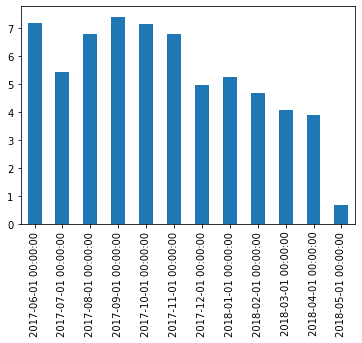

In [52]:
retention[1].plot(kind='bar')
plt.show()

**Kesimpulan Sementara**
    Pada cohort pertama dapat diambil kesimpulan :
* findings:
    * Bulan September 2017 merupakan bulan paling banyak user kembali menggunakan situs
    * Bulan Mei 2018 merupakan bulan paling sedit user kembali menggunakan situs

* insight: 
    * Grafik miring ke kanan semenjak memasuki bulan keempat (september) artinya setiap bulannya terjadi penurunan user

### Penjualan

* Kapan orang-orang mulai melakukan pembelian? (Dalam analisis KPI, kita biasanya tertarik untuk mengetahui waktu yang berlalu sejak dilakukannya pendaftaran hingga terjadinya konversi (atau ketika pengguna resmi beralih menjadi pelanggan). Sebagai contoh, jika pendaftaran dan pembelian pertama terjadi pada hari yang sama, pengguna bisa dimasukkan ke dalam kategori Konversi h0. Jika pembelian pertama terjadi pada hari berikutnya, kategorinya pun akan menjadi Konversi h1. Kamu boleh menggunakan pendekatan apa pun yang memungkinkanmu untuk membandingkan konversi dari kohort yang berbeda, sehingga kamu bisa menentukan kohort atau saluran pemasaran mana yang paling efektif.).
* Berapa jumlah pesanan yang mereka buat selama periode waktu tertentu?
* Berapa besaran rata-rata pembeliannya?
* Berapa jumlah uang yang mereka kontribusikan? (LTV)

#### Kapan orang-orang mulai melakukan pembelian?

In [53]:
# cek dataset nya
df_orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [54]:
# buat variabel baru untuk kunjungan pertama pelanggan
first_orders = df_orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
# perbaiki nama kolom
first_orders.columns = ['uid', 'first_order_ts']

In [55]:
# ekstrak data / membagi data sesuai year, month, week and date\
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_week'] = first_orders['first_order_ts'].astype('datetime64[W]')
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')
first_orders['first_order_year'] = first_orders['first_order_ts'].astype('datetime64[Y]')

In [56]:
# cek data first order
first_orders.head()

,uid,first_order_ts,first_order_dt,first_order_week,first_order_month,first_order_year
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01


In [57]:
# cek data first visits
first_visits.head()

,uid,first_session_start_ts,first_session_dt,first_session_week,first_session_month,first_session_year
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,2018-01-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,2018-02-01,2018-01-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,2017-06-01,2017-01-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-28,2017-09-01,2017-01-01


In [58]:
# gabungkan first order dan first visit untuk mendapatkan variabel pembelian pertama
first_buy = pd.merge(first_visits, first_orders, on='uid')
first_buy.head()

,uid,first_session_start_ts,first_session_dt,first_session_week,first_session_month,first_session_year,first_order_ts,first_order_dt,first_order_week,first_order_month,first_order_year
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01


In [59]:
# cek tipe datanya 
first_buy.dtypes

uid                               uint64
first_session_start_ts    datetime64[ns]
first_session_dt                  object
first_session_week        datetime64[ns]
first_session_month       datetime64[ns]
first_session_year        datetime64[ns]
first_order_ts            datetime64[ns]
first_order_dt                    object
first_order_week          datetime64[ns]
first_order_month         datetime64[ns]
first_order_year          datetime64[ns]
dtype: object

In [60]:
# rubah tipe data ke datetime
first_buy['first_order_dt'] = pd.to_datetime(first_buy['first_order_dt'])
first_buy['first_session_dt'] = pd.to_datetime(first_buy['first_session_dt'])

In [61]:
# buat kolom hari pertama pembelian
first_buy['days_to_first_purchase'] = (first_buy['first_order_dt'] - first_buy['first_session_dt']).dt.days
first_buy.head()

,uid,first_session_start_ts,first_session_dt,first_session_week,first_session_month,first_session_year,first_order_ts,first_order_dt,first_order_week,first_order_month,first_order_year,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,0


In [62]:
# coba filter kolom first buy
first_buy[first_buy['days_to_first_purchase']==0][['first_session_start_ts', 'first_order_ts']]

,first_session_start_ts,first_order_ts
1,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2017-10-11 17:14:00,2017-10-11 18:33:00
4,2017-11-24 10:14:00,2017-11-24 10:14:00
5,2018-03-03 12:08:00,2018-03-03 12:33:00
7,2018-03-03 13:47:00,2018-03-03 13:50:00
...,...,...
36513,2017-08-24 23:15:00,2017-08-24 23:42:00
36514,2017-08-10 21:37:00,2017-08-10 21:40:00
36517,2018-02-05 19:35:00,2018-02-05 19:39:00
36519,2017-09-22 23:48:00,2017-09-22 23:55:00


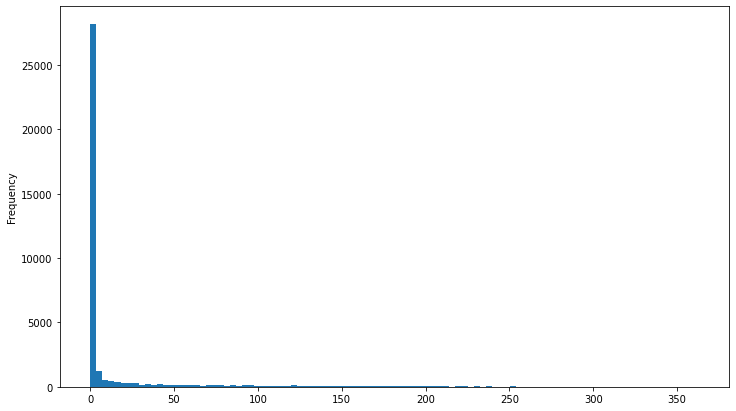

In [63]:
# buat grafik nya
first_buy['days_to_first_purchase'].plot(kind='hist', bins=100, figsize=(12,7))
plt.show()

In [64]:
# cek deskripsinya
first_buy['days_to_first_purchase'].describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: days_to_first_purchase, dtype: float64

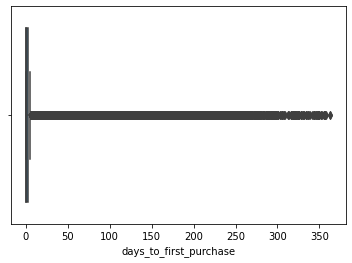

In [65]:
# buat boxplot nya
sns.boxplot(first_buy['days_to_first_purchase'])
plt.show()

In [66]:
# cek jumlah value nya
first_buy['days_to_first_purchase'].value_counts()

0      25039
1       1966
2        685
3        452
4        386
       ...  
314        1
309        1
299        1
358        1
341        1
Name: days_to_first_purchase, Length: 349, dtype: int64

**Kesimpulan sementera**
* findings :
    * Banyak orang melakukan pembelian pertama pada hari yang sama saat mereka pertama kali mengunjungi situs
    * Grafik miring ke kanan, artinya semakin lama hari dari kunjungan pertama, semakin sedikit user yang melakukan pembelian
    * Terdapat orang-orang yang melakukan pembelian pertama setelah hari ke 50 dan lebih, namun jumlah mereka sangat sedikit, kurang dari 5 orang

* insight :
    * Orang-orang yang melakukan pembelian tidak pada hari ke-0 mungkin mereka butuh pertimbangan keputusan dahulu apakah mereka akan membeli atau tidak

#### Berapa jumlah pesanan yang mereka buat selama periode waktu tertentu?

Asumsikan periode waktunya 6 bulan awal setelah user tersebut berkunjung ke website

In [67]:
# ekstrak order date month dan week
df_orders['order_dt'] = df_orders['buy_ts'].dt.date
df_orders['order_month'] = df_orders['buy_ts'].astype('datetime64[M]')
df_orders['order_week'] = df_orders['buy_ts'].astype('datetime64[W]')

In [68]:
# cek kolom dan baris dalam dataset
df_orders.shape

(50415, 6)

In [69]:
# cek datanya
df_orders.head()

,buy_ts,revenue,uid,order_dt,order_month,order_week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [70]:
# buat agregasi pemesanan
df_orders_agg = df_orders.groupby(['uid']).agg({'buy_ts': 'count', 'revenue': 'sum'})

In [71]:
# perbaiki nama kolom
df_orders_agg.columns = ['count_transaction', 'sum_revenue']
df_orders_agg

,count_transaction,sum_revenue
uid,,
313578113262317,1,0.55
1575281904278712,2,3.05
2429014661409475,1,73.33
2464366381792757,1,2.44
2551852515556206,2,10.99
...,...,...
18445147675727495770,1,3.05
18445407535914413204,3,0.88
18445601152732270159,1,4.22


In [72]:
# cek deskripsi nya
df_orders_agg.describe()

,count_transaction,sum_revenue
count,36523.000000,36523.000000
mean,1.380363,6.901328
std,3.454461,88.128535
min,1.000000,0.000000
25%,1.000000,1.470000
50%,1.000000,3.050000
75%,1.000000,5.800000
max,239.000000,11810.180000


In [73]:
df_orders.groupby(['order_month']).agg({
    'buy_ts': 'count',
    'revenue': 'sum'
})

,buy_ts,revenue
order_month,,
2017-06-01,2354,9557.49
2017-07-01,2363,12539.47
2017-08-01,1807,8758.78
2017-09-01,3387,18345.51
2017-10-01,5679,27987.70
2017-11-01,5659,27069.93
2017-12-01,6218,36388.60
2018-01-01,4721,19417.13
2018-02-01,5281,25560.54


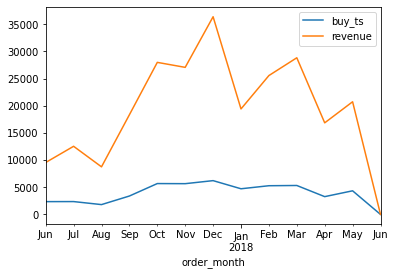

In [74]:
# buat grafiknya setiap bulan
df_orders.groupby(['order_month']).agg({
    'buy_ts': 'count',
    'revenue': 'sum'
}).plot()
plt.show()

**Kesimpulan Sementara**
* findings :
    * Jumlah pesanan setiap bulannya terus mengalami fluktuatif
    * Bulan Desember 2017 merupakan bulan dengan jumlah pesanan terbanyak
    * Bulan Juni 2018 merupakan bulan dengan jumlah pesanan paling sedikit bahkan hanya 1 pesanan saja
    
* insight :
    * Terdapat kemungkinan bahwa bulan juni 2018 hanya terhitung pada tanggal 1 juni
    * Pada bulan desember banyak orang membeli produk dari situs karena akhir tahun biasanya terdapat libur panjang dan banyak diskon

#### Berapa besaran rata-rata pembeliannya?

In [75]:
# cek datanya
df_orders.head()

,buy_ts,revenue,uid,order_dt,order_month,order_week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [76]:
# rata-rata pembelian perhari
df_orders.groupby('order_dt')['revenue'].sum().mean()

692.4648351648353

In [77]:
# rata-rata pembelian perminggu
df_orders.groupby('order_week')['revenue'].sum().mean()

4755.79622641509

In [78]:
# rata-rata pembelian perbulan
df_orders.groupby('order_month')['revenue'].sum().mean()

19389.015384615268

**Kesimpulan Sementara**
* rata-rata pembelian setiap hari adalah 692.5 dolar
* rata-rata pembelian setiap minggu adalah 4755.8 dolar
* rata-rata pembelian setiap bulan adalah 19389 dolar

In [79]:
# rata-rata pembelian setiap user per hari
orders_dt = df_orders.groupby('order_dt').agg({'revenue': 'sum', 'uid': 'nunique'})
orders_dt

,revenue,uid
order_dt,,
2017-06-01,389.46,86
2017-06-02,324.11,101
2017-06-03,166.48,61
2017-06-04,195.21,59
2017-06-05,441.49,146
...,...,...
2018-05-28,740.00,178
2018-05-29,491.06,174
2018-05-30,1021.69,189


In [80]:
orders_dt.max()

revenue    4661.33
uid         701.00
dtype: float64

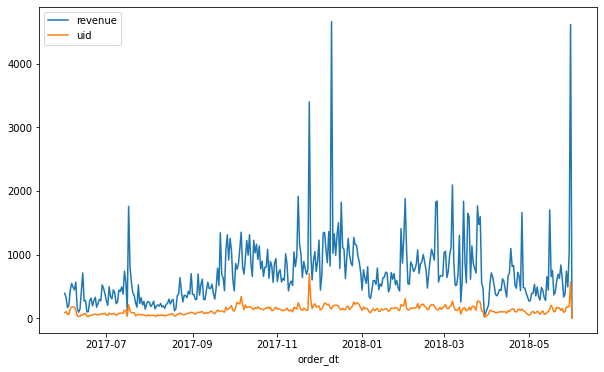

In [81]:
# Buat grafiknya
orders_dt.plot(kind='line',figsize=(10,6))
plt.show()

In [82]:
# rata-rata pembelian per user setiap hari
(orders_dt['revenue'] / orders_dt['uid']).mean()

5.33093075333997

* findings :
    * Rata-rata pembelian per user setiap hari adalah 5.3 dolar
    * Rata-rata pembelian per user setiap hari selalu mengalami fluktuatif
    * Bulan Desember 2017 merupakan bulan dengan jumlah pembelian terbanyak
    * Top 1 user dengan pembelian terbanyak adalah User id 701 dengan revenue 4661.33
    * Top 2 user dengan pembelian terbanyak adalah User id 570 dengan revenue 4613.92

In [83]:
# rata-rata pembelian setiap user per minggu
orders_week = df_orders.groupby('order_week').agg({'revenue': 'sum', 'uid': 'nunique'})
orders_week.head(10)

,revenue,uid
order_week,,
2017-06-01,2546.66,774
2017-06-08,2536.51,478
2017-06-15,1527.33,310
2017-06-22,2099.22,396
2017-06-29,2449.82,416
2017-07-06,2675.45,445
2017-07-13,4922.39,733
2017-07-20,2240.05,396
2017-07-27,1527.42,285


In [84]:
orders_week.max()

revenue    11041.61
uid         1696.00
dtype: float64

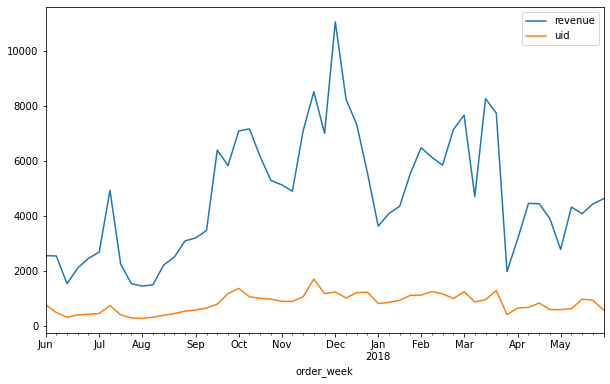

In [85]:
# Buat grafiknya
orders_week.plot(kind='line',figsize=(10,6))
plt.show()

In [86]:
# rata-rata pembelian per user setiap minggu
(orders_week['revenue'] / orders_week['uid']).mean()

5.77611793353189

* findings :
    * Rata-rata pembelian per user setiap minggu adalah 5.7 dolar
    * Rata-rata pembelian per user setiap minggu selalu mengalami fluktuatif
    * Bulan Desember 2017 merupakan bulan dengan jumlah pembelian terbanyak
    * Top 1 user dengan pembelian terbanyak adalah User id 1696 dengan revenue 11041

In [87]:
# rata-rata pembelian setiap user per bulan
orders_month = df_orders.groupby('order_month').agg({'revenue': 'sum', 'uid': 'nunique'})
orders_month

,revenue,uid
order_month,,
2017-06-01,9557.49,2023
2017-07-01,12539.47,1984
2017-08-01,8758.78,1472
2017-09-01,18345.51,2750
2017-10-01,27987.70,4675
2017-11-01,27069.93,4547
2017-12-01,36388.60,4942
2018-01-01,19417.13,3898
2018-02-01,25560.54,4258


In [88]:
orders_month.max()

revenue    36388.6
uid         4942.0
dtype: float64

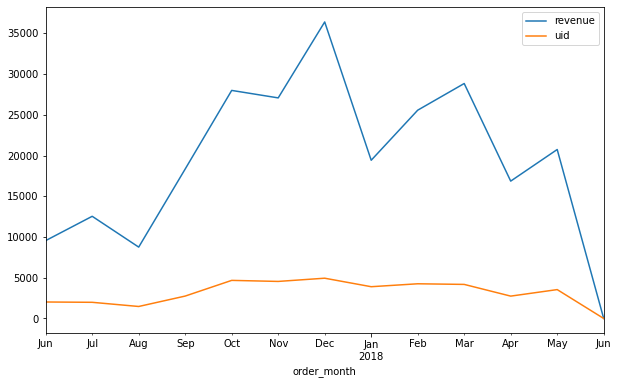

In [89]:
# Buat grafiknya
orders_month.plot(kind='line',figsize=(10,6))
plt.show()

In [90]:
# rata-rata pembelian per user setiap bulan
(orders_month['revenue'] / orders_month['uid']).mean()

5.866513626792354

* findings :
    * Rata-rata pembelian per user setiap bulan adalah 5.8 dolar
    * Rata-rata pembelian per user setiap bulan selalu mengalami fluktuatif
    * Bulan Desember 2017 merupakan bulan dengan jumlah pembelian terbanyak
    * Top 1 user dengan pembelian terbanyak adalah User id 4942 dengan revenue 36388.6

#### Berapa jumlah uang yang mereka kontribusikan? (LTV)

In [91]:
# cek datanya
first_buy.head()

,uid,first_session_start_ts,first_session_dt,first_session_week,first_session_month,first_session_year,first_order_ts,first_order_dt,first_order_week,first_order_month,first_order_year,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,0


In [92]:
# buat cohort analisis nya berdasarkan pemesanan pertama
cohort_sizes = first_buy.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
# perbaiki nama kolomnya
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [93]:
# gabungkan df_orders dan first_buy
cohorts = pd.merge(df_orders, first_buy, how='inner', on='uid')
cohorts_agg = cohorts.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()

In [94]:
first_buy.head()

,uid,first_session_start_ts,first_session_dt,first_session_week,first_session_month,first_session_year,first_order_ts,first_order_dt,first_order_week,first_order_month,first_order_year,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,0


In [95]:
df_orders.head()

,buy_ts,revenue,uid,order_dt,order_month,order_week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [96]:
first_buy.head()

,uid,first_session_start_ts,first_session_dt,first_session_week,first_session_month,first_session_year,first_order_ts,first_order_dt,first_order_week,first_order_month,first_order_year,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,0


In [97]:
cohorts.head()

,buy_ts,revenue,uid,order_dt,order_month,order_week,first_session_start_ts,first_session_dt,first_session_week,first_session_month,first_session_year,first_order_ts,first_order_dt,first_order_week,first_order_month,first_order_year,days_to_first_purchase
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:09:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01 07:31:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,0


In [98]:
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [99]:
cohorts_agg.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [100]:
# hitung umur user dalam bulan
cohorts_agg['age_month'] = (cohorts_agg['order_month'] - cohorts_agg['first_order_month']).dt.days
cohorts_agg['age_month'] = round(cohorts_agg['age_month']/30,0).astype('int')
cohorts_agg

,first_order_month,order_month,revenue,age_month
0,2017-06-01,2017-06-01,9557.49,0
1,2017-06-01,2017-07-01,981.82,1
2,2017-06-01,2017-08-01,885.34,2
3,2017-06-01,2017-09-01,1931.30,3
4,2017-06-01,2017-10-01,2068.58,4
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,2
75,2018-04-01,2018-04-01,10600.69,0
76,2018-04-01,2018-05-01,1209.92,1
77,2018-05-01,2018-05-01,13925.76,0


In [101]:
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [102]:
# tambah customer dan hitung ltv nya
margin_rate = 0.5

cohorts_report = pd.merge(cohort_sizes, cohorts_agg, on='first_order_month')
cohorts_report['gp'] = cohorts_report['revenue'] * margin_rate
cohorts_report['ltv'] = cohorts_report['gp'] / cohorts_report['n_buyers']
cohorts_report

,first_order_month,n_buyers,order_month,revenue,age_month,gp,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4778.745,2.362207
1,2017-06-01,2023,2017-07-01,981.82,1,490.910,0.242664
2,2017-06-01,2023,2017-08-01,885.34,2,442.670,0.218819
3,2017-06-01,2023,2017-09-01,1931.30,3,965.650,0.477336
4,2017-06-01,2023,2017-10-01,2068.58,4,1034.290,0.511265
...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,557.435,0.157780
75,2018-04-01,2276,2018-04-01,10600.69,0,5300.345,2.328798
76,2018-04-01,2276,2018-05-01,1209.92,1,604.960,0.265800
77,2018-05-01,2988,2018-05-01,13925.76,0,6962.880,2.330281


In [103]:
# agregasikan cohort 
cohorts_ltv = cohorts_report.pivot_table(
    index='first_order_month',
    columns='age_month',
    values='ltv',
    aggfunc='mean'
).cumsum(axis=1)

In [104]:
cohorts_ltv.round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.36,2.6,2.82,3.3,3.81,4.18,4.66,4.95,5.22,5.53,5.81,5.94
2017-07-01,3.01,3.17,3.48,3.66,3.75,3.83,3.89,3.96,4.04,4.12,4.19,
2017-08-01,2.64,2.87,3.1,3.3,3.55,3.69,3.79,4.0,4.14,4.24,,
2017-09-01,2.82,3.38,3.64,5.63,5.83,6.15,6.5,6.63,6.72,,,
2017-10-01,2.50,2.77,2.87,2.94,3.02,3.08,3.12,3.18,,,,
2017-11-01,2.58,2.78,2.88,3.04,3.11,3.14,3.2,,,,,
2017-12-01,2.37,2.5,2.96,3.49,3.65,3.82,,,,,,
2018-01-01,2.07,2.22,2.37,2.44,2.47,,,,,,,
2018-02-01,2.08,2.22,2.26,2.29,,,,,,,,


* findings : 
    * Hampir setiap bulan memiliki ltv yang konstan yang signifikan
    * Beberapa bulan memiliki ltv yang cenderung meningkat setiap bulannya
    * Pada bulan Juni 2017 memiliki ltv yang cenderung meningkat secara signifikan setiap bulannya
    * Ada bulan-bulan tertentu di mana ltv tiba-tiba meningkat. Contohnya, pada bulan September 2017, retention rate melonjak secara signifikan pada bulan ke-4 (5.63) dan ke-5 (5.83)

* insight :
    * User cenderung sering melakukan pembayaran atau berlangganan setiap bulannya

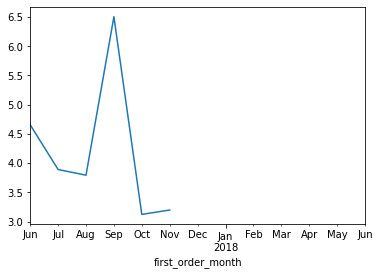

In [105]:
# buat grafiknya berdasarkan bulan yang difilter
cohorts_ltv[6].plot()
plt.show()

**Analisis LTV bulan ke 6**
* findings :
    * Bulan September 2017 adalah bulan yang memiliki ltv paling tinggi
    * LTV selama 6 bulan cenderung mengalami fluktuatif
    * Bulan November 2017 merupakan bulan yang memiliki ltv paling kecil

In [106]:
# cari rata-rata di bulan 1 dan 6
print("Average LTV in 6 months is:", round(cohorts_ltv[6].mean(),2))
print("Average LTV in 1 months is:", round(cohorts_ltv[1].mean(),2))

Average LTV in 6 months is: 4.19
Average LTV in 1 months is: 2.7


* Nilai rata-rata LTV di bulan ke 6 lebih tinggi dari bulan pertama

### Pemasaran

* Berapa jumlah uang yang dihabiskan? Keseluruhan/per sumber/dari waktu ke waktu
* Berapa biaya akuisisi pelanggan dari masing-masing sumber?
* Seberapa menguntungkannya investasi tersebut? (ROI)

In [107]:
# cek dataset nya
df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


#### Berapa jumlah uang yang dihabiskan? Keseluruhan/per sumber/dari waktu ke waktu

In [108]:
# total uang yang dihabiskan
print('Total costs {}'.format(df_costs['costs'].sum()))

Total costs 329131.62


In [109]:
# rata-rata uang yang dihabiskan
print('Avg costs {}'.format(df_costs['costs'].mean()))

Avg costs 129.47742722265932


In [110]:
# uang yang dihabiskan dari waktu kewaktu dalam bulan
df_costs['costs_month'] = df_costs['dt'].astype('datetime64[M]')
df_costs.head()

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [111]:
# cari harga pemasaran setiap bulannya
df_costs.pivot_table(index='costs_month',
                      values='costs', 
                      aggfunc='sum')

,costs
costs_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


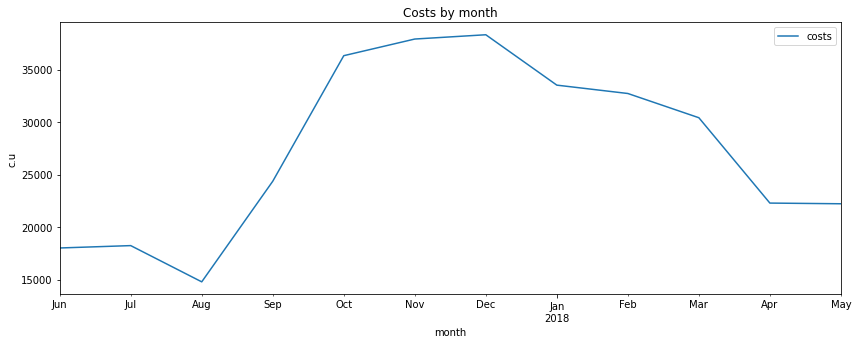

In [112]:
# grafik uang yang dihabiskan secara keseluruhan dari waktu ke waktu
(df_costs.pivot_table(index='costs_month',
                      values='costs', 
                      aggfunc='sum')).plot(figsize=(14,5), 
                                           title='Costs by month', 
                                           xlabel='month',
                                           ylabel='c.u')
plt.show()

In [113]:
# crata-rata harga pemasaran setiap bulannya
df_costs.pivot_table(index='costs_month',
                      values='costs', 
                      aggfunc='sum').mean()

costs    27427.635
dtype: float64

* findings :
    * Rata-rata Costs yang dihabiskan untuk pemasaran setiap bulannya adalah 27427.6 dollar
    * Bulan Desember 2017 merupakan bulan yang paling tinggi cost yang dihabiskan untuk pemasaran
    * Biaya Costs paling sedikit ada di bulan agustus 2017
    * Biaya costs pemasasran mulai naik dari bulan september hingga desember 2017
    * Masuk tahun 2018 harga costs pemasaran mulai menurun setiap bulannya

In [114]:
# harga pemasaran per sumber
print('Costs per source:')
df_costs.groupby('source_id').agg({'costs': 'sum'}).sort_values(by='costs')

Costs per source:


,costs
source_id,
9,5517.49
10,5822.49
1,20833.27
2,42806.04
5,51757.10
4,61073.60
3,141321.63


In [115]:
# agregasikan pembelian per source dari waktu ke waktu
df_costs.pivot_table(index='costs_month', 
                     columns='source_id', 
                     values='costs', 
                     aggfunc='sum')

source_id,1,2,3,4,5,9,10
costs_month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


In [116]:
# rata-rata pembelian per source dari waktu ke waktu
df_costs.pivot_table(index='costs_month', 
                     columns='source_id', 
                     values='costs', 
                     aggfunc='sum').mean()

source_id
1      1736.105833
2      3567.170000
3     11776.802500
4      5089.466667
5      4313.091667
9       459.790833
10      485.207500
dtype: float64

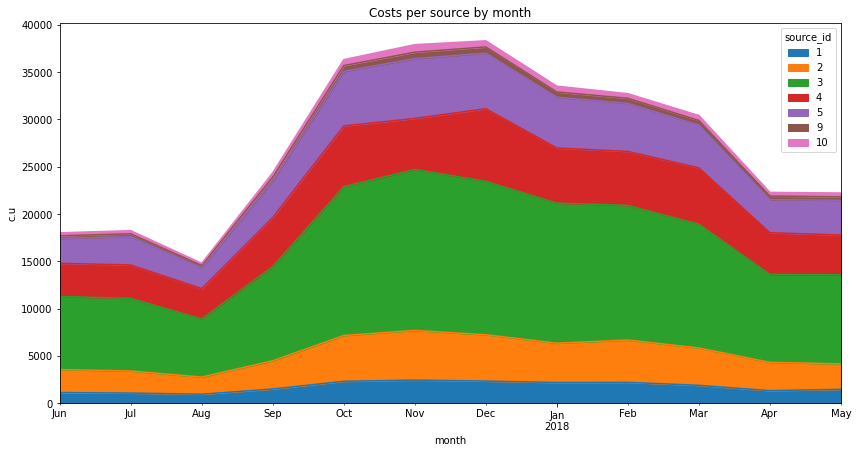

In [117]:
# grafik pembelian per source dari waktu ke waktu
(df_costs.pivot_table(index='costs_month', 
                      columns='source_id', 
                      values='costs', 
                      aggfunc='sum').plot.area(figsize=(14,7), 
                                                 title='Costs per source by month', 
                                                 xlabel='month', 
                                                 ylabel='c.u'))
plt.show()

* findings :
    * Costs pemasaran paling banyak dimiliki oleh source id 3
    * Source id 9 adalah source yang paling sedikit costs pemasarannya
    * Costs pemasaran setiap sumber mulai mengalami kenaikan dari bulan september hingga desember 2017
    * Memasuki tahun 2018 costs pemasarannya mulai menurun

* insight :
    * Bisa jadi source id 3 merupakan sumber yang terkenal sehingga biaya pemasarannya tinggi setiap bulannya

#### Berapa biaya akuisisi pelanggan dari masing-masing sumber? (CAC)

In [118]:
# cek dataset
df_costs.head()

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [119]:
# rata-rata CAC
print('Mean CAC is :', round(df_costs['costs'].sum() / df_orders['uid'].nunique(),2))

Mean CAC is : 9.01


* rata2 CAC setiap user adalah sekitar 9 dolar

In [120]:
# cek tabel first_buy
first_buy.head()

,uid,first_session_start_ts,first_session_dt,first_session_week,first_session_month,first_session_year,first_order_ts,first_order_dt,first_order_week,first_order_month,first_order_year,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,0


In [121]:
# cek tabel vis
vis.head()

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_start_ts,first_session_dt,first_session_week,first_session_month,first_session_year,age_days,age_months
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-14,2017-12-01,2017-01-01,0,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-15,2018-02-01,2018-01-01,0,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,2017-01-01,0,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01,2018-01-01,72,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01,2018-01-01,0,0


In [122]:
# temukan source pertama setiap pengunjung
users = vis.sort_values('session_start_ts').groupby('uid').first()
users = users[['source_id']]

In [123]:
# gabungkan tabel first_buy dan users
buyers = pd.merge(first_buy, users, left_on='uid', right_index=True)

In [124]:
# tampilkan users
users

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5
...,...
18446403737806311543,5
18446424184725333426,4
18446556406699109058,3


In [125]:
# cek berapa banyak user setiap source nya
users['source_id'].value_counts()

4     72346
3     66116
5     49237
2     17616
1      9469
10     6903
9      6448
7        32
6         2
Name: source_id, dtype: int64

* findings:
    * Source id 4 merupakan sumber yang paling banyak diakses oleh user
    * Sangat sedit User yang mengakses source id 6

In [126]:
# tampilkan buyers
buyers.head()

,uid,first_session_start_ts,first_session_dt,first_session_week,first_session_month,first_session_year,first_order_ts,first_order_dt,first_order_week,first_order_month,first_order_year,days_to_first_purchase,source_id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01,107,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,0,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,0,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01,1,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,0,5


In [127]:
# kelompokkan tabel buyers perharinya
buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])

buyers_daily.head()

,source_id,first_order_dt,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


In [128]:
# gabungkan tabel buyers daily dan costs
costs = pd.merge(buyers_daily, df_costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])

In [129]:
# cari cac nya
costs['cac'] = (costs['costs'] / costs['n_buyers'])

In [130]:
# periksa datanya
costs.head()

,source_id,first_order_dt,n_buyers,dt,costs,costs_month,cac
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,5.371429
1,1,2017-06-02,7,2017-06-02,62.25,2017-06-01,8.892857
2,1,2017-06-03,7,2017-06-03,36.53,2017-06-01,5.218571
3,1,2017-06-04,3,2017-06-04,55.00,2017-06-01,18.333333
4,1,2017-06-05,18,2017-06-05,57.08,2017-06-01,3.171111


In [131]:
# rata2 CAC per source
cac = costs.groupby('source_id').agg({'cac': 'mean'}).round(2)
cac

,cac
source_id,
1,9.49
2,16.29
3,15.58
4,7.27
5,8.34
9,6.84
10,6.56


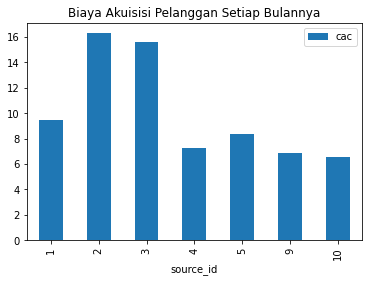

In [132]:
# buat grafiknya
cac.plot(kind='bar')
plt.title('Biaya Akuisisi Pelanggan Setiap Bulannya')
plt.show()

In [133]:
# rata-rata cac setiap sumber
cac.mean()

cac    10.052857
dtype: float64

* findings :
    * Rata-rata cac setiap sumber adalah 10 dolar
    * Source id 2 memiliki cac paling tinggi yaitu 16.29
    * Cac paling sedikit dimiliki oleh source id 10
    
* insight :
    * Bisa jadi source id adalah source yang terkenal sehingga cac nya tinggi

#### Seberapa menguntungkannya investasi tersebut? (ROI)

In [134]:
# Kelompokkan data penjualan berdasarkan source id 
roi1 = df_costs.groupby('source_id')['costs'].sum()

In [135]:
# Kelompokkan data kunjungan berdasarkan user id
roi2 = df_visits.groupby('uid')['source_id'].first()

In [136]:
# kelompokkan pendapatan berdasarkan user id 
roi3 = df_orders.groupby('uid')['revenue'].sum()

In [137]:
# gabungkan data kunjungan dan pendapatan
roi = pd.DataFrame(roi2).join(pd.DataFrame(roi3))
roi

,source_id,revenue
uid,,
11863502262781,3,NaN
49537067089222,2,NaN
297729379853735,3,NaN
313578113262317,2,0.55
325320750514679,5,NaN
...,...,...
18446403737806311543,5,NaN
18446424184725333426,4,NaN
18446556406699109058,3,NaN


In [138]:
# kelompokkan data revenue berdasarkan source id kemudian jumlahkan
roi_final = roi.groupby('source_id')['revenue'].sum()
roi_final

source_id
1     38560.06
2     65152.26
3     44317.68
4     52479.75
5     40357.91
6         0.00
7         1.22
9      7076.98
10     4111.34
Name: revenue, dtype: float64

In [139]:
# gabungkan roi final dengan roi1
roi_final = pd.DataFrame(roi_final).join(pd.DataFrame(roi1))
roi_final

,revenue,costs
source_id,,
1,38560.06,20833.27
2,65152.26,42806.04
3,44317.68,141321.63
4,52479.75,61073.60
5,40357.91,51757.10
6,0.00,NaN
7,1.22,NaN
9,7076.98,5517.49
10,4111.34,5822.49


In [140]:
# isi nilai yang hilang dengan 0
roi_final.fillna(0, inplace=True)
roi_final

,revenue,costs
source_id,,
1,38560.06,20833.27
2,65152.26,42806.04
3,44317.68,141321.63
4,52479.75,61073.60
5,40357.91,51757.10
6,0.00,0.00
7,1.22,0.00
9,7076.98,5517.49
10,4111.34,5822.49


In [141]:
# tambahkan kolom profit
roi_final['profit'] = (roi_final['revenue'] - roi_final['costs'])
roi_final

,revenue,costs,profit
source_id,,,
1,38560.06,20833.27,17726.79
2,65152.26,42806.04,22346.22
3,44317.68,141321.63,-97003.95
4,52479.75,61073.60,-8593.85
5,40357.91,51757.10,-11399.19
6,0.00,0.00,0.00
7,1.22,0.00,1.22
9,7076.98,5517.49,1559.49
10,4111.34,5822.49,-1711.15


In [142]:
# tambahkan kolom roi
roi_final['roi'] = (roi_final['profit'] / roi_final['costs'])

# isi nilai yang hilang dengan 0
roi_final.fillna(0, inplace=True)
roi_final

,revenue,costs,profit,roi
source_id,,,,
1,38560.06,20833.27,17726.79,0.850889
2,65152.26,42806.04,22346.22,0.522034
3,44317.68,141321.63,-97003.95,-0.686406
4,52479.75,61073.60,-8593.85,-0.140713
5,40357.91,51757.10,-11399.19,-0.220244
6,0.00,0.00,0.00,0.000000
7,1.22,0.00,1.22,inf
9,7076.98,5517.49,1559.49,0.282645
10,4111.34,5822.49,-1711.15,-0.293886


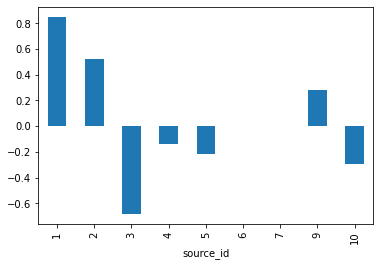

In [143]:
roi_final['roi'].plot(kind='bar')
plt.show()

* findings : 
    * Sumber 1 memiliki roi paling tinggi
    * TOP 3 roi paling bagus adalah sumber 1, 2 dan 9
    * Sumber 3 memiliki roi paling rendah
    
* insight :
    * Sumber 1, 2, dan 9 bisa jadi adalah sumber yang sering di kunjungi oleh user

* recommendation :
    * Perusahaan sebaiknya tetap mengiklankan produk pada Sumber 1, 2 dan 9 karena ketiga sumber tersebut merupakan top 3 sumber yang memiliki roi yang tinggi
    * Perusahaan sebaiknya berhenti mengiklankan produk pada sumber ke 3, karena roi nya sangat sedikit dan bahkan minus

## Langkah 3 : Kesimpulan Umum

* Sampaikan kepada para spesialis marketing berapa banyak uang yang harus diinvestasikan dan ke mana saja uang tersebut harus diinvestasikan.
* Sumber/platform apa yang akan kamu rekomendasikan? 
* Berikan alasan yang mendukung pilihanmu: metrik apa saja yang menjadi fokusmu? Mengapa? 
* Kesimpulan apa yang kamu buat setelah menemukan nilai dari metrik-metrik tersebut?

**Kesimpulan Umum**

1. Perusahaan sebaiknya menginvestasikan uangnya atau mengiklankan produk pada Sumber atau platform 1, 2 dan 9 karena ketiga sumber tersebut merupakan top 3 platform yang memiliki roi yang tinggi.

2. Berdasarkan data yang telah dihitung diatas, CAC setiap user adalah 9 dolar. Jadi, jika ingin mengetahui total biaya yang harus diinvestasikan adalah dengan mengalikan CAC dengan jumlah pelanggan baru yang di inginkan. Contohnya, jika perusahaan ingin menargetkan 1000 pelanggan baru maka uang yang harus diinvestasikan adalah 9000 dolar.

3. Metrik yang menjadi fokus utama adalah :
    - Return on Investment (ROI): ROI memberikan gambaran tentang efektivitas setiap sumber pemasaran. Fokus pada sumber dengan ROI tinggi akan memaksimalkan hasil investasi.
    - Customer Acquisition Cost (CAC): CAC penting untuk memahami biaya perolehan pelanggan. Fokus pada sumber dengan CAC yang rendah membantu mengoptimalkan pengeluaran.
    - Pembelian Pertama: Menarik untuk memahami perilaku pembelian pertama. Dapat memberikan wawasan tentang waktu yang dibutuhkan pelanggan sebelum melakukan pembelian.

4. Kesimpulan apa yang saya buat setelah menemukan nilai dari metrik-metrik tersebut adalah :
    - Pertimbangkan kembali penyesuaian strategi marketing pada sumber-sumber dengan ROI rendah atau bahkan menghentikan investasi pada sumber yang tidak memberikan ROI positif
    - Tetap memantau fluktuasi dan tren bulanan untuk mengidentifikasi potensi perubahan dalam perilaku pengguna atau masalah teknis.
    - Retensi pengguna yang menunjukkan fluktuasi dan penurunan. Perusahaan dapat mempertimbangkan strategi retensi pelanggan untuk memperpanjang umur pelanggan
    - Evaluasi dan perbaiki retensi pelanggan untuk meningkatkan nilai sepanjang waktu.